In [12]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import scipy as sp
from scipy import stats
import pydot
import shap
import statsmodels.formula.api as smf
#from sklearn import preprocessing
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import utils
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import pickle
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numbers

In [13]:
import sys
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parameters comparison

tensorflow model: go up with time intervals
torch model: constant

torch: 

35041 = 

100 (gamma) + 100 (beta) + 110$\times$100 (w) + 110 (gamma) + 110 (beta) + 110$\times$110 (w) + 110 (gamma) + 110 (beta) + 100$\times$ 110 (w) + 100 (gamma) + 100 (beta) + 100 (z_init) + 1 (y_init)

tf: (time interval = 2) 

35041 = 

100 (gamma) + 100 (beta) + 100$\times$110 (w) + 110 (gamma) + 110 (beta) + 110$\times$110 (w) + 110 (gamma) + 110 (beta) + 100$\times$110 (w) + 100 (gamma) +100 (beta) + 100 (z_init) + 1 (y_init)

tf: (time interval = 3)

69981 = 34940*2 + 101 = 100 (z_init) + 1 (y_init) + 2 $\times$ 

(100 (gamma) + 100 (beta) + 100$\times$110 (w) + 110 (gamma) + 110 (beta) + 110$\times$110 (w) + 110 (gamma) + 110 (beta) + 100$\times$110 (w) + 100 (gamma) + 100 (beta) )

### Comparison of torch vs tf 

#### Commit id: 4848f82 lambda = 1.0

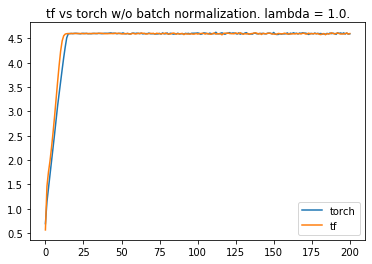

In [18]:
df_torch = pd.read_csv('DeepBSDE_torch/logs/HJB_training_history_1.csv')
df_tf = pd.read_csv('DeepBSDE/logs/HJB_training_history_1.csv')
plt.plot(df_torch.target_value, label='torch')
plt.plot(df_tf.target_value, label='tf')
plt.legend()
plt.title('tf vs torch w/o batch normalization. lambda = 1.0.')
plt.show()

#### Commit id: 448d50d. lambda = 50

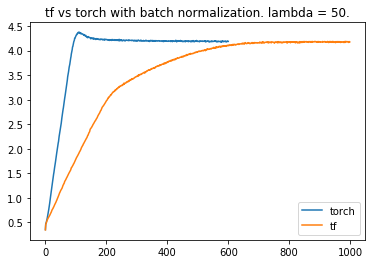

In [39]:
df_torch = pd.read_csv('DeepBSDE_torch/logs/HJB_training_history_1.csv') # 60000 ~ 7447 seconds
df_tf = pd.read_csv('DeepBSDE/logs/HJB_training_history_1.csv') # 200000 ~ 5635
plt.plot(df_torch.target_value, label='torch')
plt.plot(df_tf.target_value[:1000], label='tf')
plt.legend()
plt.title('tf vs torch with batch normalization. lambda = 50.')
plt.show()

#### Commit id: 

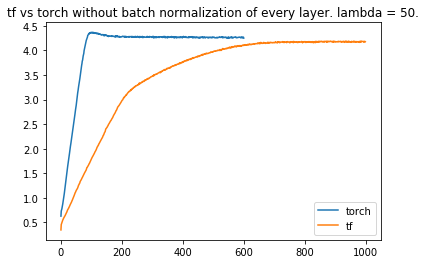

In [41]:
df_torch = pd.read_csv('DeepBSDE_torch/logs/HJB_training_history_1.csv')
df_tf = pd.read_csv('DeepBSDE/logs/HJB_training_history_1.csv')
plt.plot(df_torch.target_value, label='torch')
plt.plot(df_tf.target_value[:1000], label='tf')
plt.legend()
plt.title('tf vs torch without batch normalization of every layer. lambda = 50.')
plt.show()